In [ ]:
#TASK-04-Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

# I HAVE TAKEN TWITTER DATASET 

#NAME -PRAGYA SAINI

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
train_data = pd.read_csv(r"C:\Users\lenovo\Desktop\TWITER DATASET\twitter_training.csv")

In [3]:
valid_data = pd.read_csv((r"C:\Users\lenovo\Desktop\TWITER DATASET\twitter_validation.csv"))

In [4]:
print(train_data.head())


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [5]:
print(valid_data.head())

   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                  
1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                  
2  CSGO matchmaking is so full of closet hacking,...        

In [6]:
print(train_data.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [7]:
print(train_data.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [8]:
train_data.columns = ['ID', 'Topic', 'Sentiment', 'Text']

X_train = train_data['Text']
y_train = train_data['Sentiment']

In [9]:
valid_data.columns = ['ID', 'Topic', 'Sentiment', 'Text']
X_valid = valid_data['Text']
y_valid = valid_data['Sentiment']

In [19]:
X_train = train_data['Text']
y_train = train_data['Sentiment']
X_valid = valid_data['Text']
y_valid = valid_data['Sentiment']

In [23]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   Topic      74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [41]:
all_data = pd.concat([train_data, valid_data])

In [43]:
print(all_data.head())

     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [44]:
print(all_data.isnull().sum())


ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64


In [97]:
all_data = all_data.dropna(subset=['Text'])

In [99]:
all_data['Text'] = all_data['Text'].str.lower()

In [46]:
import seaborn as sns

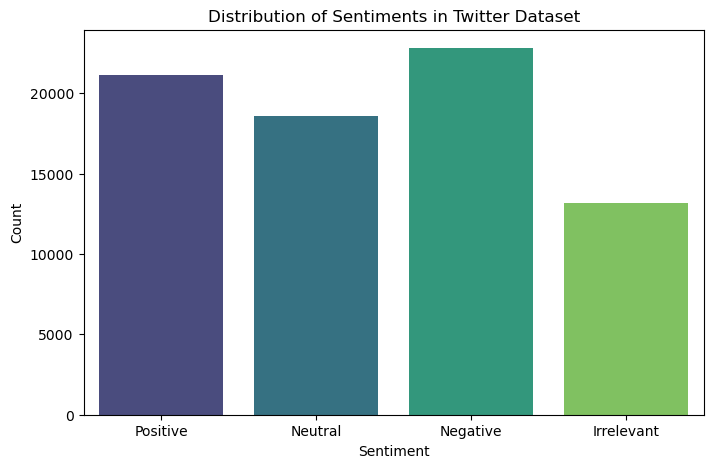

In [47]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=all_data, palette='viridis')
plt.title('Distribution of Sentiments in Twitter Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


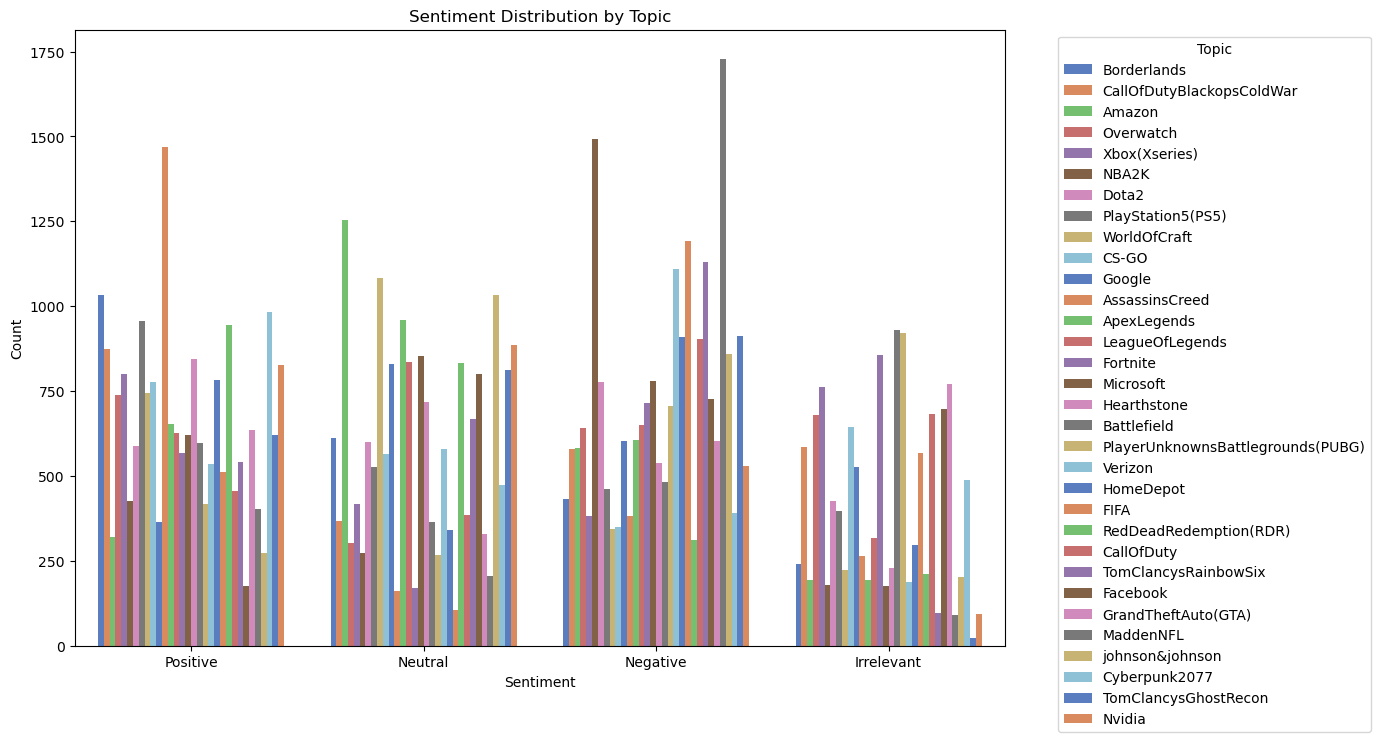

In [48]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Sentiment', hue='Topic', data=all_data, palette='muted')
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


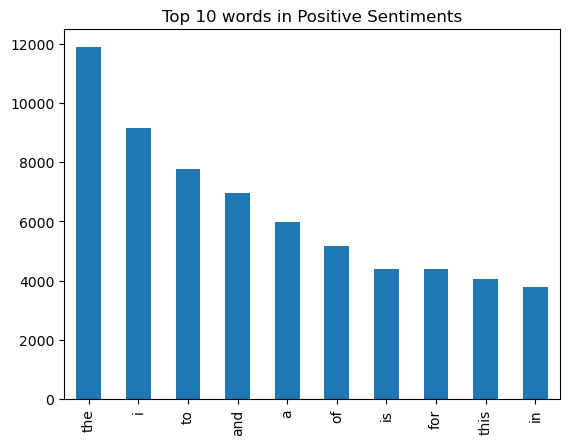

In [100]:
positive_words = ' '.join(all_data[all_data['Sentiment'] == 'Positive']['Text'])
positive_word_freq = pd.Series(positive_words.split()).value_counts()
positive_word_freq[:10].plot(kind='bar', title='Top 10 words in Positive Sentiments')
plt.show()

In [51]:
pip install wordcloud


   ---------------------------------------- 0.0/300.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.6 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.6 kB 325.1 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.6 kB 465.5 kB/s eta 0:00:01
   ---------------------------- ----------- 215.0/300.6 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.6 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 300.6/300.6 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


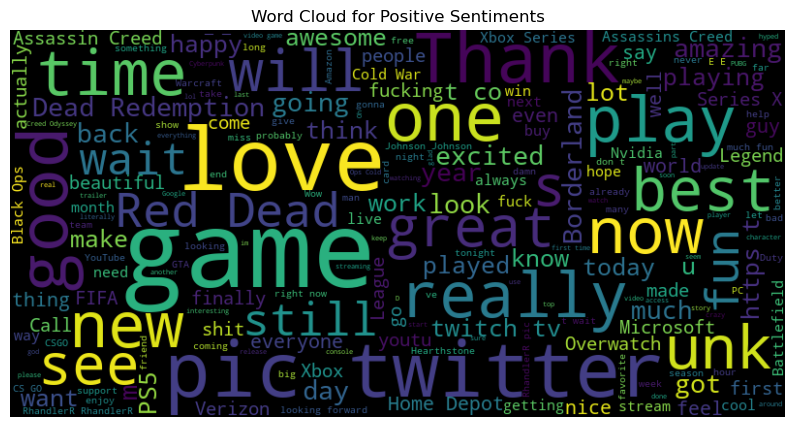

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

positive_texts = ' '.join(all_data[all_data['Sentiment'] == 'Positive']['Text'].astype(str))
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(positive_texts)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')
plt.show()

In [101]:
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords, max_font_size=110, background_color='white').generate(positive_texts)


In [64]:
sentiment_counts = all_data['Sentiment'].value_counts()
print(sentiment_counts)
sentiment_percentage = all_data['Sentiment'].value_counts(normalize=True) * 100
print(sentiment_percentage)


Negative      22808
Positive      21108
Neutral       18603
Irrelevant    13161
Name: Sentiment, dtype: int64
Negative      30.137421
Positive      27.891121
Neutral       24.581131
Irrelevant    17.390328
Name: Sentiment, dtype: float64


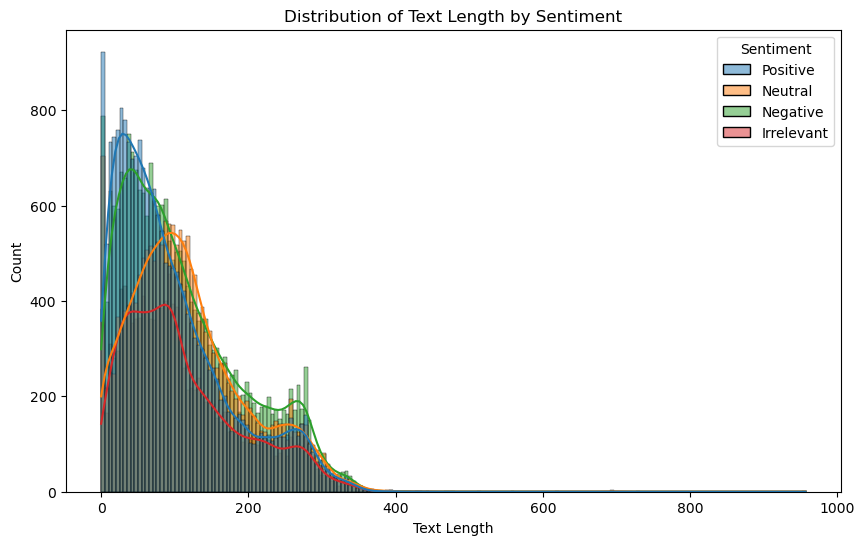

In [68]:
all_data['Text_Length'] = all_data['Text'].apply(len)

all_data.reset_index(drop=True, inplace=True)
plt.figure(figsize=(10, 6))
sns.histplot(data=all_data, x='Text_Length', hue='Sentiment', kde=True)
plt.title('Distribution of Text Length by Sentiment')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()


In [70]:
sample_size = 1000  
sampled_data = all_data.sample(n=sample_size, random_state=42)

X_sampled = vectorizer.fit_transform(sampled_data['Text'])
word_frequencies_sampled = pd.DataFrame(X_sampled.toarray(), columns=vectorizer.get_feature_names_out())
word_frequencies_sampled['Sentiment'] = sampled_data['Sentiment']

In [71]:
X_sparse = vectorizer.fit_transform(all_data['Text'])

In [74]:
word_frequencies_sampled['Sentiment'] = sampled_data['Sentiment']
word_frequencies_by_sentiment = word_frequencies_sampled.groupby('Sentiment').sum()

top_words = 10
for sentiment in sampled_data['Sentiment'].unique():
    top_words_df = word_frequencies_by_sentiment.loc[sentiment].sort_values(ascending=False).head(top_words)
    print(f"\nTop {top_words} words for {sentiment} sentiment:")
    print(top_words_df)



Top 10 words for Irrelevant sentiment:
vision       2
better       2
know         1
happen       1
google       1
took         1
tools        1
green        1
guarantee    1
mind         1
Name: Irrelevant, dtype: int64

Top 10 words for Negative sentiment:
called     1
store      1
depot      1
hell       1
bro        1
did        1
blogs      1
people     1
outside    1
videos     1
Name: Negative, dtype: int64

Top 10 words for Neutral sentiment:
owning     1
thank      1
uno        1
emote      1
scout      1
squad      1
rainbow    1
man        1
missing    1
fuck       1
Name: Neutral, dtype: int64

Top 10 words for Positive sentiment:
pcmag          1
redemption     1
pic            1
qualifying     1
day            1
daxkerrigan    1
overdue        1
dawber         1
technical      1
sterling       1
Name: Positive, dtype: int64


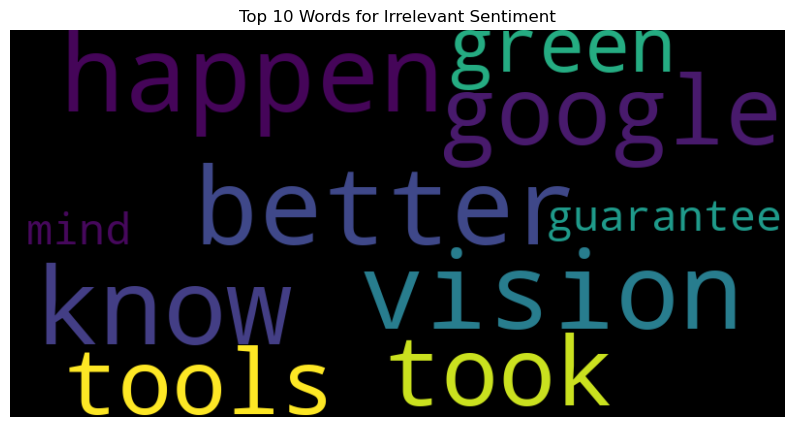

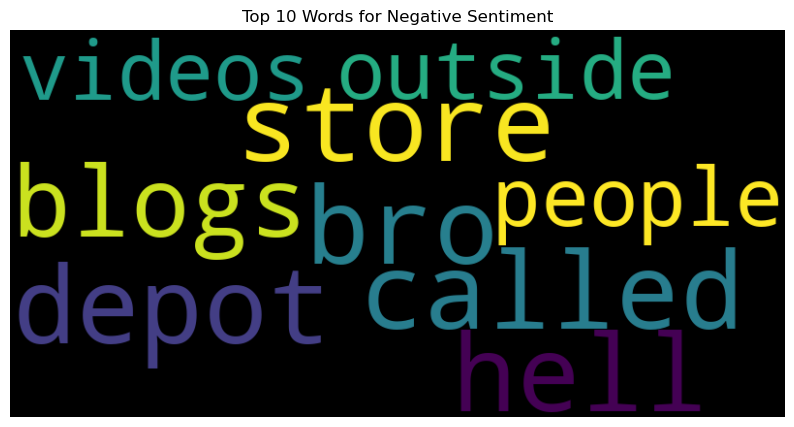

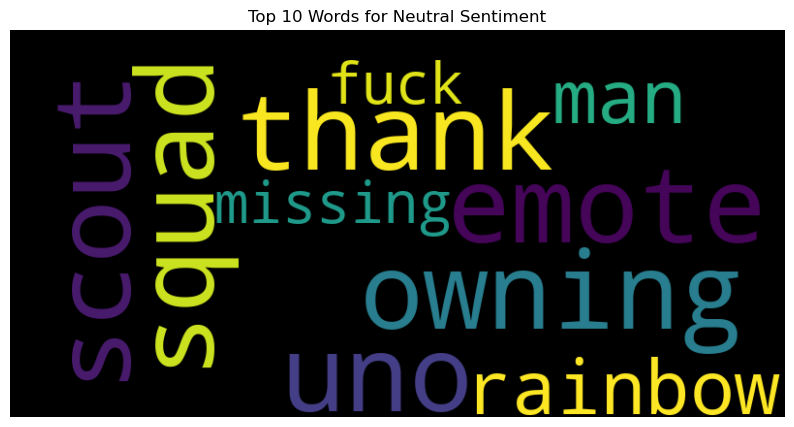

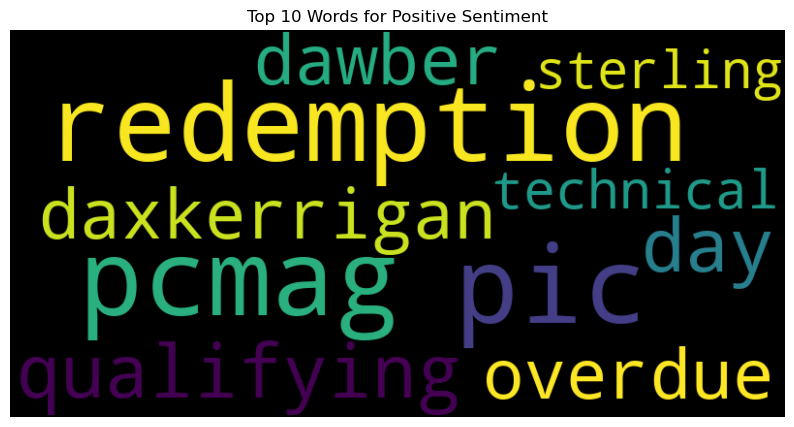

In [75]:
from wordcloud import WordCloud

for sentiment in sampled_data['Sentiment'].unique():
    top_words_df = word_frequencies_by_sentiment.loc[sentiment].sort_values(ascending=False).head(top_words)
    top_words_text = ' '.join(top_words_df.index)
    
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(top_words_text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Top {top_words} Words for {sentiment} Sentiment')
    plt.show()

In [82]:
pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 262.6 kB/s eta 0:00:03
     --- --------------------------------- 61.4/636.8 kB 409.6 kB/s eta 0:00:02
     ------------ ------------------------- 204.8/636.8 kB 1.1 MB/s eta 0:00:01
     ------------------------ ------------- 409.6/636.8 kB 1.7 MB/s eta 0:00:01
     -------------------------------------  634.9/636.8 kB 2.5 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


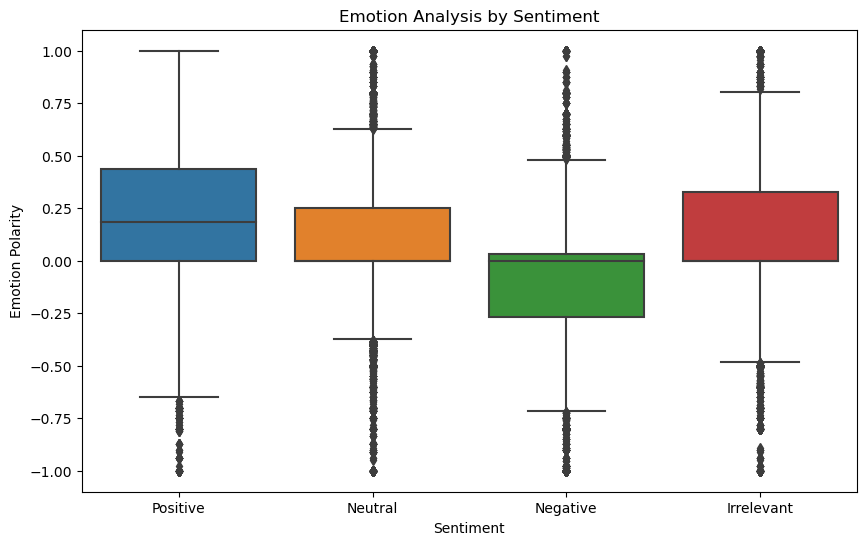

In [83]:
from textblob import TextBlob
all_data['Emotion'] = all_data['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Emotion', data=all_data)
plt.title('Emotion Analysis by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Emotion Polarity')
plt.show()


In [89]:
X_train = X_train.fillna('')
X_test = X_test.fillna('')

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [90]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]

X_test = X_test.dropna()
y_test = y_test[X_test.index]

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [102]:
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [103]:
y_pred = classifier.predict(X_test_tfidf)

In [104]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.64


In [105]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.73      0.34      0.47      2608
    Negative       0.61      0.81      0.70      4551
     Neutral       0.68      0.52      0.59      3770
    Positive       0.62      0.74      0.67      4207

    accuracy                           0.64     15136
   macro avg       0.66      0.60      0.61     15136
weighted avg       0.65      0.64      0.62     15136


Confusion Matrix:
 [[ 895  732  285  696]
 [  80 3666  346  459]
 [ 155  868 1967  780]
 [  96  716  294 3101]]


In [ ]:
#SO The model shows reasonably good performance for the 'Negative' class with high precision (0.61) and recall (0.81).
#The 'Irrelevant' class has lower precision (0.73) but relatively low recall (0.34).
#The 'Neutral' class has balanced precision (0.68) and recall (0.52).
#The 'Positive' class also shows balanced precision (0.62) and recall (0.74).
#The overall accuracy of the model is 0.64, and the weighted average F1-score is 0.62. 
